Гусєва Анна, 2 варіант

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Підключіть необхідні бібліотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Завантажте дані. Вони знаходяться в директорії input

In [3]:
path = "/content/drive/My Drive/bigml_59c28831336c6604c800002a.csv"
bnk = pd.read_csv(path, sep=',')
bnk.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Яким є розподіл абонентів за цільовою ознакою churn? Назвіть відсоток лояльних абонентів

In [5]:
print(bnk['churn'].value_counts())
bnk['churn'].value_counts(normalize = True)

False    2850
True      483
Name: churn, dtype: int64


False    0.855086
True     0.144914
Name: churn, dtype: float64

Жителі якого штату розмовляють телефоном найбільше? менше всього? Зверніть увагу, що нас цікавлять усі види дзвінків

In [6]:
bnk.groupby('state')[['total day calls', 'total night calls', 'total eve calls', 'total intl calls']].sum().sum(axis=1).sort_values(ascending=False).head(1)

state
WV    32523
dtype: int64

In [7]:
total_calls = bnk.groupby('state')[['total day calls', 'total night calls', 'total eve calls', 'total intl calls']].sum()
total_calls_sum = total_calls.sum(axis=1)
total_calls_sum.sort_values(ascending=True).head(1)

state
CA    10582
dtype: int64

In [8]:
bnk.groupby('state')[['total day minutes', 'total night minutes', 'total eve minutes', 'total intl minutes']].mean().sum(axis=1).sort_values(ascending=False).head(1)

state
IN    619.323944
dtype: float64

Чи вірно, що люди, які здійснюють багато міжнародних дзвінків, набувають international plan? Не забувайте про візуалізацію інформації

<Axes: xlabel='total intl calls', ylabel='count'>

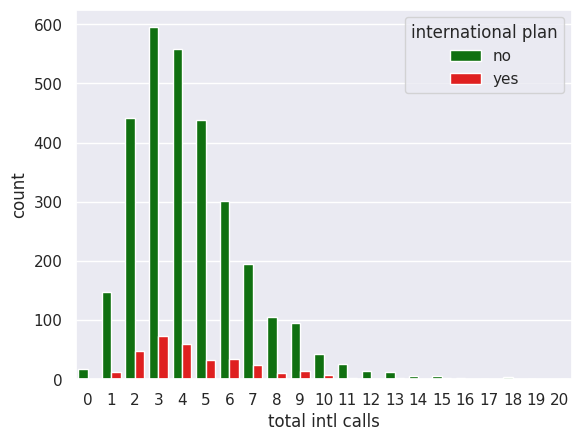

In [9]:
sns.countplot(x = 'total intl calls', hue = 'international plan', data = bnk, palette = ['green', 'red'])

Незалежно від кількості міжнародних дзвінків интернаціональний план всеодно більше не підключають, ніж підключають

Як пов'язані наявність голосової пошти та міжнародного плану з лояльністю абонентів? Перевірте статистичну значущість цих зв'язків

In [10]:
import scipy as sp

cross_table = pd.crosstab(bnk['voice mail plan'], bnk['churn'])

print(sp.stats.fisher_exact(cross_table))
print(cross_table)

SignificanceResult(statistic=0.4734090520620288, pvalue=1.141385384134011e-09)
churn            False  True 
voice mail plan              
no                2008    403
yes                842     80


Абонементи, які користуються голосовою поштою, ймовірніше будуть лояльними

In [11]:
cross_table = pd.crosstab(bnk['international plan'], bnk['churn'])

print(sp.stats.fisher_exact(cross_table))
print(cross_table)

SignificanceResult(statistic=5.671079619615886, pvalue=6.28598931370855e-39)
churn               False  True 
international plan              
no                   2664    346
yes                   186    137


Абонементи, які не користуються міжнародними дзвінками, ймовірніше будуть більш лояльними, ніж ті, хто користується

Що можна сказати про взаємозв'язок кількості звернень до кол-центру та лояльності? Не забувайте про візуалізацію інформації

Коефіцієнт кореляції: 0.20874999878379405


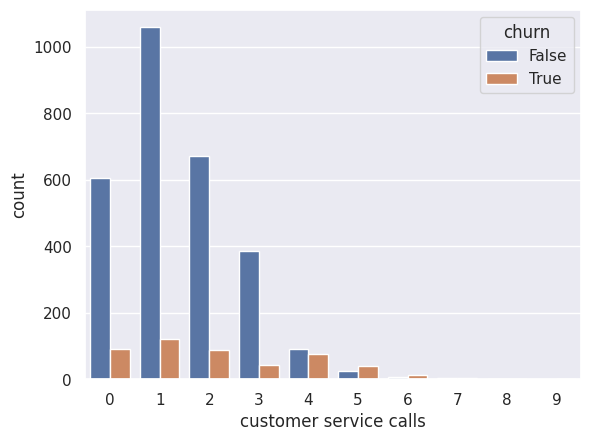

In [12]:
sns.countplot(x = 'customer service calls', hue = 'churn', data = bnk)
correlation = bnk['churn'].corr(bnk['customer service calls'])
print(f"Коефіцієнт кореляції: {correlation}")

Чим більше клієнту доводиться дзвонити у центр, тим ймовірніше він не буде лояльним

Які з числових ознак мають найбільший рівень кореляції? Чому?

In [13]:
corr_mtx = bnk.corr()

corr_values = corr_mtx.abs()

max_corr = corr_values.unstack().sort_values(ascending=True)

print(max_corr)

total intl calls        total night calls         0.000305
total night calls       total intl calls          0.000305
number vmail messages   total day charge          0.000776
total day charge        number vmail messages     0.000776
total day minutes       number vmail messages     0.000778
                                                    ...   
                        total day minutes         1.000000
number vmail messages   number vmail messages     1.000000
area code               area code                 1.000000
customer service calls  customer service calls    1.000000
churn                   churn                     1.000000
Length: 289, dtype: float64


<ipython-input-13-cfa4d811d3ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = bnk.corr()


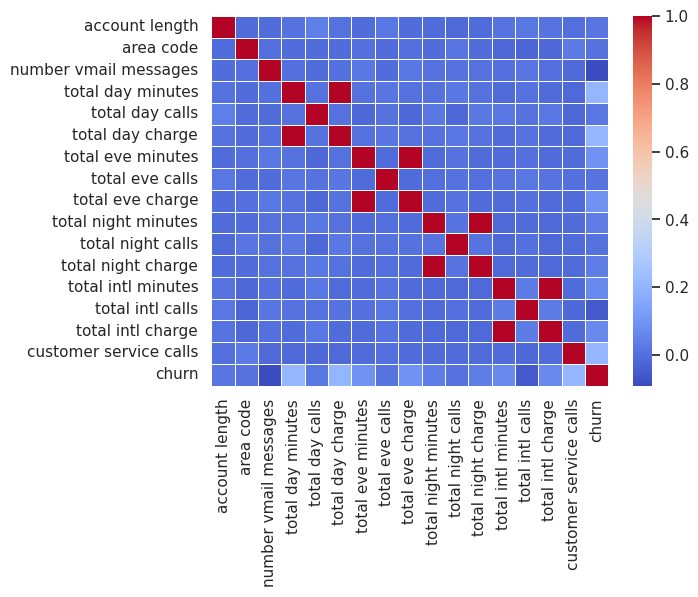

In [14]:
sns.heatmap(corr_mtx, cmap='coolwarm', linewidths=0.5)
plt.show()

Чи пов'язаний час користування обліковим записом із кількістю звернень до кол-центру?

Коефіцієнт кореляції: -0.0037959389270460554


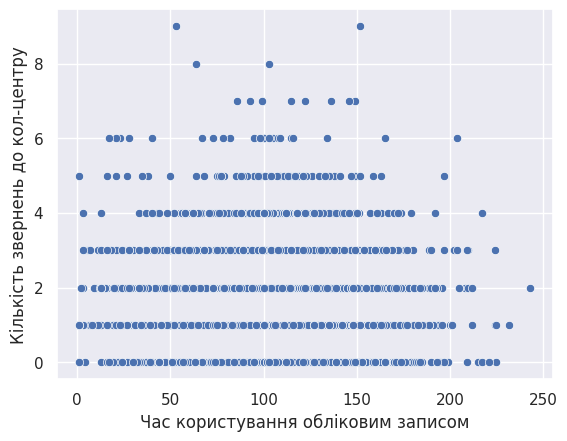

In [15]:
correlation = bnk['account length'].corr(bnk['customer service calls'])

print(f"Коефіцієнт кореляції: {correlation}")

sns.scatterplot(x = 'account length', y = 'customer service calls', data = bnk)
plt.xlabel('Час користування обліковим записом')
plt.ylabel('Кількість звернень до кол-центру')
plt.show()

Наскільки "лоялен" кожен штат?

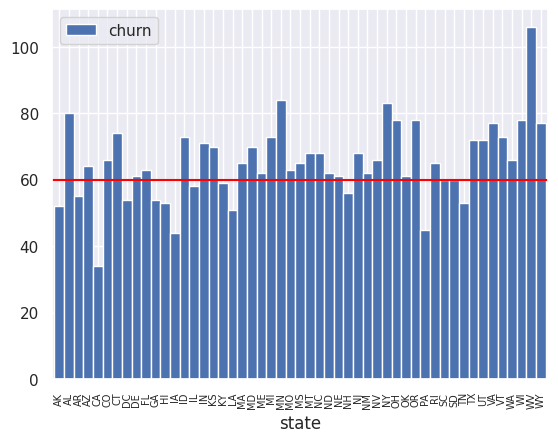

In [16]:
state_churn = bnk.groupby('state')['churn'].count()
ax = state_churn.plot(kind = 'bar', width = 1)
ax.set_xticks(range(len(state_churn.index)))
ax.set_xticklabels(state_churn.index, fontsize=7)
plt.axhline(y=60, color='red', linestyle='-')
plt.legend()
plt.show()

Чи залежить лояльність від часу користування акаунтом?

Коефіцієнт кореляції: 0.016540742243674116


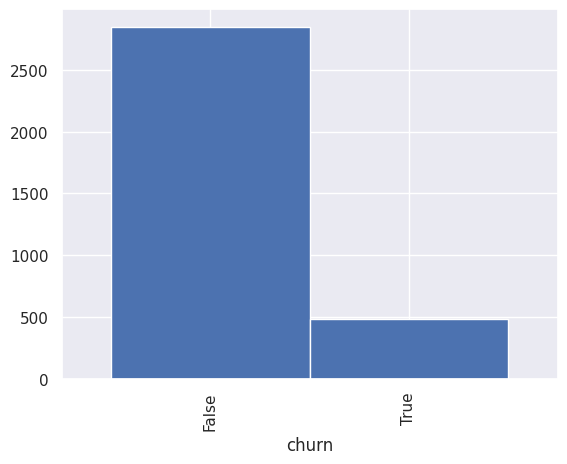

In [17]:
correlation = bnk['account length'].corr(bnk['churn'])

print(f"Коефіцієнт кореляції: {correlation}")
state_churn = bnk.groupby('churn')['account length'].count()
ax = state_churn.plot(kind = 'bar', width = 1)
plt.show()

<Axes: xlabel='state'>

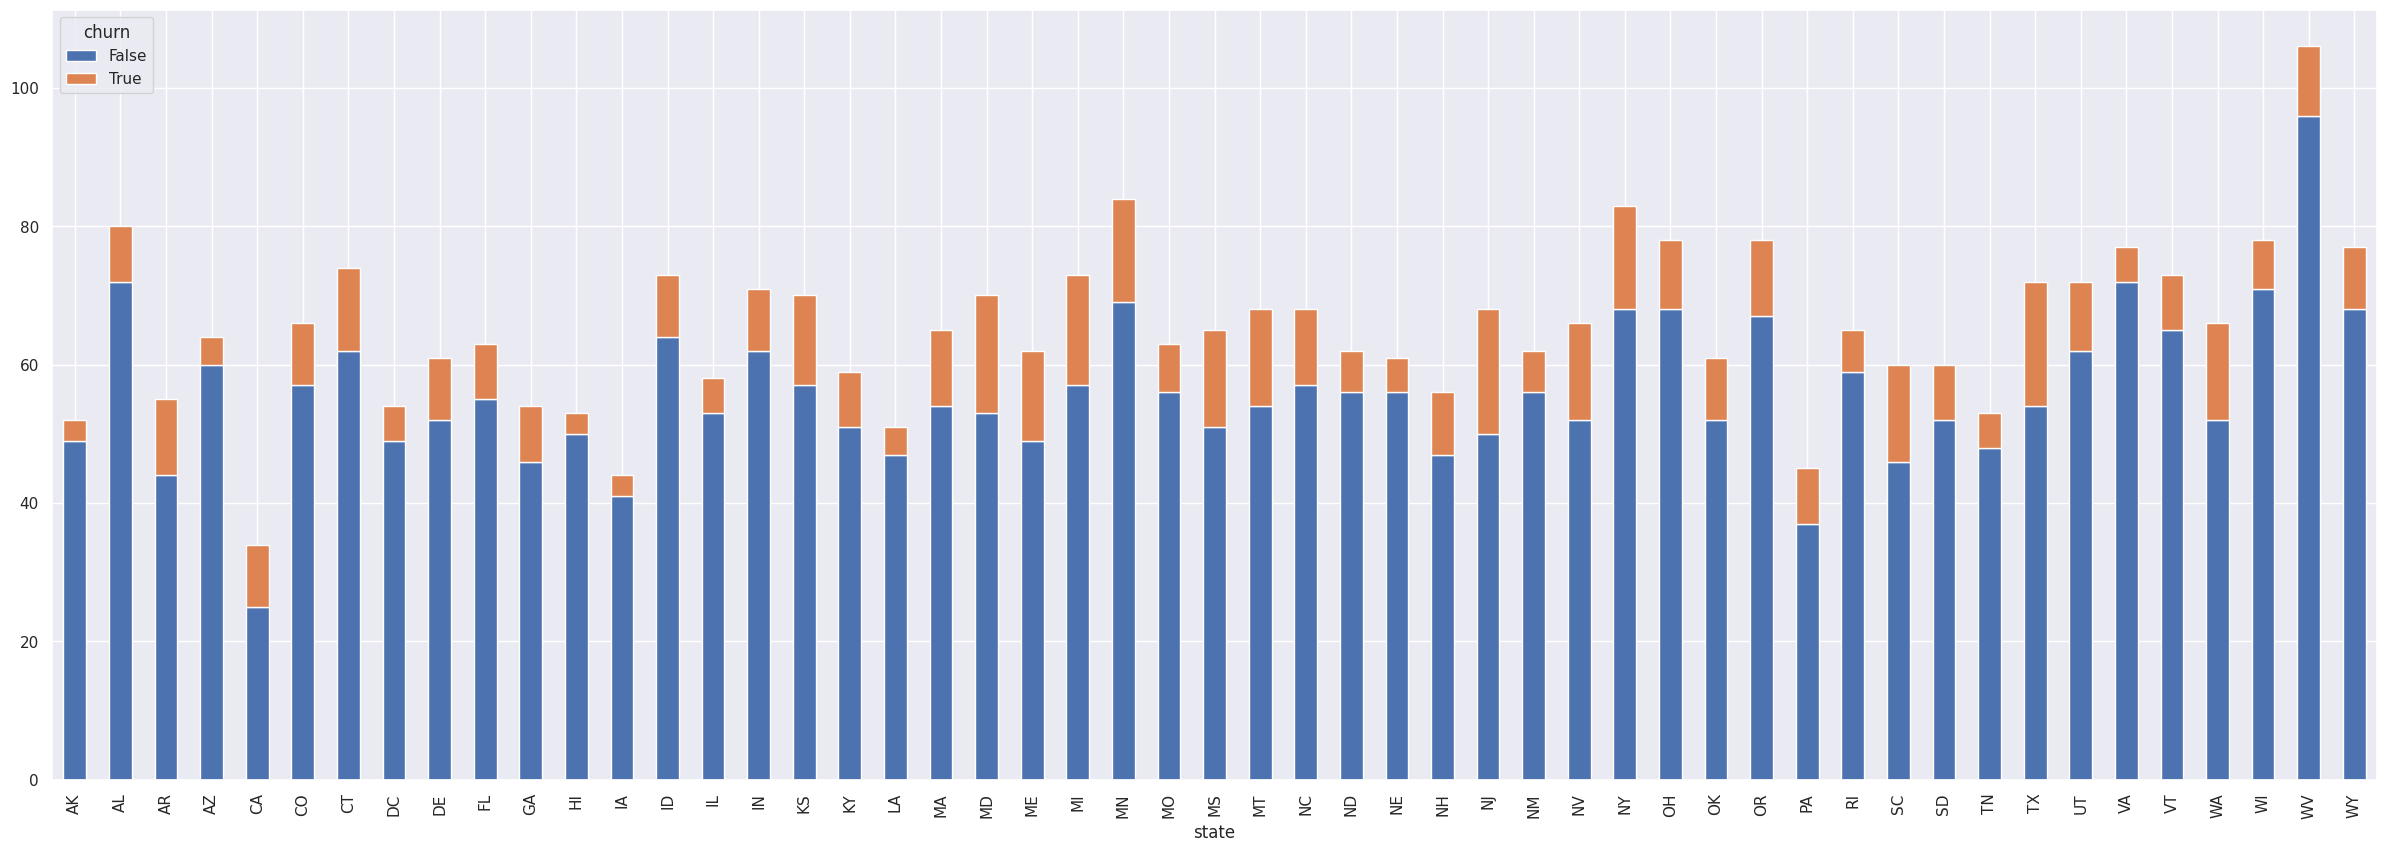

In [18]:
bnk.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

In [19]:
!git clone https://github.com/anna-gusyeva/Machine-Learning.git

Cloning into 'Machine-Learning'...


In [21]:
!git commit

fatal: not a git repository (or any of the parent directories): .git
